In [1]:
# Libraries
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import urllib
import urllib2
import re
import scipy.stats as stats
import unicodedata
import datetime
import requests
import requests_cache
requests_cache.install_cache('demo_cache')
%matplotlib inline

In [2]:
# Helper function--time string to seconds int
def time_to_sec(time):
    time_list = time.split(':')
    return int(time_list[0]) * 60 + int(time_list[1])

## Scrape season totals statistics for each team, 1986-2017

In [3]:
link = 'https://www.basketball-reference.com/leagues/NBA_2017_totals.html'
page = urllib.urlopen(link).read()
soup = BeautifulSoup(page, "lxml")

In [4]:
yr = link[49:53]
yr

'2017'

In [5]:
tabs = soup.findAll('table')
table = tabs[0]

In [6]:
rows = table.findAll('tr')

In [7]:
rows

[<tr>\n<th aria-label="Rank" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>\n<th aria-label="Player" class=" poptip sort_default_asc center" data-stat="player" scope="col">Player</th>\n<th aria-label="Position" class=" poptip sort_default_asc center" data-stat="pos" data-tip="Position" scope="col">Pos</th>\n<th aria-label="Age of Player at the start of February 1st of that season." class=" poptip sort_default_asc center" data-stat="age" data-tip="Age of Player at the start of February 1st of that season." scope="col">Age</th>\n<th aria-label="Team" class=" poptip sort_default_asc center" data-stat="team_id" data-tip="Team" scope="col">Tm</th>\n<th aria-label="Games" class=" poptip center" data-stat="g" data-tip="Games" scope="col">G</th>\n<th aria-label="Games Started" class=" poptip center" data-stat="gs" data-tip="Games Started" scope="col">GS</th>\n<th aria-label="Minutes Played" class=" poptip center" d

In [3]:
def scrape_season_data(link):
    page = urllib.urlopen(link).read()
    soup = BeautifulSoup(page, "lxml")
    
    yr = link[49:53]
    tabs = soup.findAll('table')
    table = tabs[0]
    rows = table.findAll('tr')
    
    season_log = pd.DataFrame()
    for row in rows:
        if len(row) == 30:
            tds = row.findAll('td')
            #print tds[0]
            info = row.findAll('a')[0]
            player = info.text
            #print player
            player_id = info.get('href')[11:20]
            #print player_id
            #print tds[28].text
            season_log = season_log.append({'player': player,
                                            'yr': int(link[49:53]),
                                            'id': player_id,
                                            'pos': tds[1].text,
                                            'age': tds[2].text,
                                            'team': tds[3].text,
                                            'G': tds[4].text,
                                            'GS': tds[5].text,
                                            'mp': tds[6].text,
                                            #'secs': time_to_sec(tds[6].text),
                                            'fg': int(tds[7].text),
                                            'fga': int(tds[8].text),
                                            'fg_pct': tds[9].text,
                                            'fg3': int(tds[10].text),
                                            'fg3a': int(tds[11].text),
                                            'fg3_pct': tds[12].text,
                                            'fg2': int(tds[13].text),
                                            'fg2a': int(tds[14].text),
                                            'fg2_pct': tds[15].text,
                                            'efg': tds[16].text,
                                            'ft': int(tds[17].text),
                                            'fta': int(tds[18].text),
                                            'ft_pct': tds[19].text,
                                            'orb': int(tds[20].text),
                                            'drb': int(tds[21].text),
                                            'trb': int(tds[22].text),
                                            'ast': int(tds[23].text),
                                            'stl': int(tds[24].text),
                                            'blk': int(tds[25].text),
                                            'tov': int(tds[26].text),
                                            'pf': int(tds[27].text),
                                            'pts': int(tds[28].text)},
                                        ignore_index=True)
    return season_log

In [9]:
# Links to scrape
links = ['https://www.basketball-reference.com/leagues/NBA_' + str(yr) + '_totals.html'
         for yr in range(1986,2018)]

In [10]:
links[:5]

['https://www.basketball-reference.com/leagues/NBA_1986_totals.html',
 'https://www.basketball-reference.com/leagues/NBA_1987_totals.html',
 'https://www.basketball-reference.com/leagues/NBA_1988_totals.html',
 'https://www.basketball-reference.com/leagues/NBA_1989_totals.html',
 'https://www.basketball-reference.com/leagues/NBA_1990_totals.html']

In [11]:
# Scrape each link and write out data to excel spreadsheet
for link in links:
    yr = link[49:53]
    season_log = scrape_season_data(link)
    season_log.to_excel('data/season_data/season_data_' + str(yr) + '.xlsx')

## Read in season data

In [12]:
s2017 = pd.read_excel('data/season_data/season_data_2017.xlsx')

In [13]:
s_bos = s2017[s2017['team'] == 'OKC']

In [14]:
s_bos.columns

Index([u'G', u'GS', u'age', u'ast', u'blk', u'drb', u'efg', u'fg', u'fg2',
       u'fg2_pct', u'fg2a', u'fg3', u'fg3_pct', u'fg3a', u'fg_pct', u'fga',
       u'ft', u'ft_pct', u'fta', u'id', u'mp', u'orb', u'pf', u'player',
       u'pos', u'pts', u'stl', u'team', u'tov', u'trb', u'yr'],
      dtype='object')

In [15]:
s_bos

,G,GS,age,ast,blk,drb,efg,fg,fg2,fg2_pct,...,orb,pf,player,pos,pts,stl,team,tov,trb,yr
0,68,6,23,40,8,68,0.531,134,40,0.426,...,18,114,Alex Abrines,SG,406,37,OKC,33,86,2017
4,80,80,23,86,78,332,0.571,374,374,0.572,...,281,195,Steven Adams,C,905,89,OKC,146,613,2017
99,64,1,24,130,7,68,0.372,77,65,0.406,...,19,79,Semaj Christon,PG,183,28,OKC,43,87,2017
102,13,0,28,14,0,11,0.337,16,13,0.333,...,0,18,Norris Cole,PG,43,8,OKC,7,11,2017
104,20,0,36,12,2,22,0.609,14,14,0.636,...,9,17,Nick Collison,PF,33,2,OKC,4,31,2017
187,23,16,31,13,15,65,0.500,89,88,0.494,...,38,40,Taj Gibson,PF,207,14,OKC,28,103,2017
199,78,4,22,46,75,161,0.539,146,103,0.523,...,38,144,Jerami Grant,PF,421,33,OKC,41,199,2017
251,2,0,25,3,3,5,0.636,6,4,0.571,...,4,0,Josh Huestis,PF,14,0,OKC,0,9,2017
259,3,0,29,1,1,14,0.469,6,3,0.750,...,2,5,Ersan Ilyasova,PF,15,3,OKC,4,16,2017
296,72,0,24,67,38,287,0.549,402,397,0.568,...,195,154,Enes Kanter,C,1033,32,OKC,123,482,2017


## Create season Gini coefficients

In [26]:
# Calculate usage rate as per basketball-reference equation
usg_pct = [(100 * ((fga + 0.44*fta + tov)) * (float(sum(s_bos['mp']))/5)) / 
            (mp * (sum(s_bos['fga']) + 0.44*sum(s_bos['fta']) + sum(s_bos['tov'])))
for fga, fta, tov, mp in zip(s_bos['fga'], s_bos['fta'], s_bos['tov'], s_bos['mp'])]

In [4]:
# Function for calculating usage rate for a team
# team_df: a dataframe of a single team's season statistics
# n: power to raise minutes to (n=0 is usage rate, n=1 is linearly scaled, etc.)
def calculate_usg_n(team_df, n):
    usg_pct = [mp**n * (100 * ((fga + 0.44*fta + tov)) * (float(sum(team_df['mp']))/5)) / 
                (mp * (sum(team_df['fga']) + 0.44*sum(team_df['fta']) + sum(team_df['tov'])))
    for fga, fta, tov, mp in zip(team_df['fga'], team_df['fta'], team_df['tov'], team_df['mp'])]
    return usg_pct

In [5]:
# Take usage rates, normalize them (sum = 1), sort them
def get_norm_usg(usg):
    return sorted([u/sum(usg) for u in usg])

In [6]:
# Subset only the top k usages, renormalize them
def get_norm_top_k(n_usg, k):
    new_usg = n_usg[-k:]
    return get_norm_usg(new_usg)

In [23]:
# Using the boston df, calculate usage with n=2
usg = calculate_usg_n(s_bos, 2)
# Normalize usage
n_usg = get_norm_usg(usg)
n_usg

[1.9549894828798355e-05,
 6.835627562516907e-05,
 0.0002153531387953714,
 0.00043687377768505237,
 0.0021537629172743798,
 0.002606535041645157,
 0.0032588523648126974,
 0.0060178836422541595,
 0.008310572972092672,
 0.01260926761683889,
 0.014999225721850872,
 0.023004962780272524,
 0.03393604634481398,
 0.05339283110604625,
 0.0737204704086609,
 0.08327438229322322,
 0.120380755215833,
 0.137036952494126,
 0.42455736599332095]

In [24]:
# Get top 8 players, renormalize
n_usg_k = get_norm_top_k(n_usg, 8)
n_usg_k

[0.02423351048293726,
 0.03574835320106316,
 0.05624420020499344,
 0.07765740851305938,
 0.08772153363331994,
 0.12680952024701492,
 0.1443552183298441,
 0.4472302553877678]

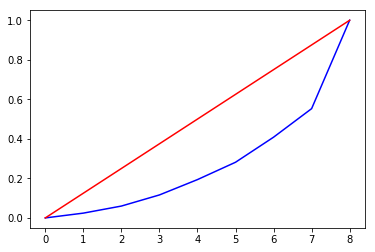

In [25]:
# 0 through length
x = range(len(n_usg_k)+1)
# Cumulative sum
y1 = np.cumsum([0] + n_usg_k)
# y=x line
y2 = [float(t)/(len(x)-1) for t in x]
plt.plot(x, y1, c='b')
plt.plot(x, y2, c='r')
plt.show()

In [27]:
gini = 2*(np.trapz(y2) - np.trapz(y1))/(x[-1]*y1[-1]) * len(n_usg_k)/(len(n_usg_k)-1)
gini

0.53225308931772042

In [28]:
season_df = pd.read_excel('data/season_data/season_data_2017.xlsx')
team = 'CLE'
team_df = season_df[season_df['team'] == team]
usg = calculate_usg_n(team_df, 2)
n_usg = get_norm_usg(usg)
n_usg_k = get_norm_top_k(n_usg, 8)
x = range(len(n_usg_k)+1)
y1 = np.cumsum([0] + n_usg_k)
y2 = [float(t)/(len(x)-1) for t in x]
gini = 2*(np.trapz(y2) - np.trapz(y1))/(x[-1]*y1[-1]) * len(n_usg_k)/(len(n_usg_k)-1)
gini

0.48921512599193334

In [7]:
def get_gini_season(season_df, team, k, n):
    team_df = season_df[season_df['team'] == team]
    usg = calculate_usg_n(team_df, n=n)
    n_usg = get_norm_usg(usg)
    n_usg_k = get_norm_top_k(n_usg, k=k)
    x = range(len(n_usg_k)+1)
    y1 = np.cumsum([0] + n_usg_k)
    y2 = [float(t)/(len(x)-1) for t in x]
    gini = 2*(np.trapz(y2) - np.trapz(y1))/(x[-1]*y1[-1]) * len(n_usg_k)/(len(n_usg_k)-1)
    return gini

In [8]:
def plot_gini_season(yr, team, k, n):
    season_df = pd.read_excel('data/season_data/season_data_' + str(yr) + '.xlsx')
    season_df = season_df[season_df['mp'] != 0]
    
    team_df = season_df[season_df['team'] == team]
    usg = calculate_usg_n(team_df, n)
    n_usg = get_norm_usg(usg)
    n_usg_k = get_norm_top_k(n_usg, k)
    x = range(len(n_usg_k)+1)
    y1 = np.cumsum([0] + n_usg_k)
    y2 = [float(t)/(len(x)-1) for t in x]
    gini = 2*(np.trapz(y2) - np.trapz(y1))/(x[-1]*y1[-1]) * len(n_usg_k)/(len(n_usg_k)-1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)

    ax.set_xlabel('Player')
    ax.set_ylabel('Cumulative weighted usage')

    ax.text(1.5, 0.5, 'Gini: '+ str(round(gini,3)), fontsize=12)
    
    ax.plot(x, y1, c='black')
    ax.plot(x, y2, c='black')
    ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor='orange', interpolate=True)
    ax.set_title('Team: ' + team + ', Season: ' + str(yr))
    plt.show()

In [57]:
season_df = pd.read_excel('data/season_data/season_data_2013.xlsx')
season_df = season_df[season_df['mp'] != 0]
get_gini_season(season_df, 'BRK', k=8, n=2)

0.41063347119382987

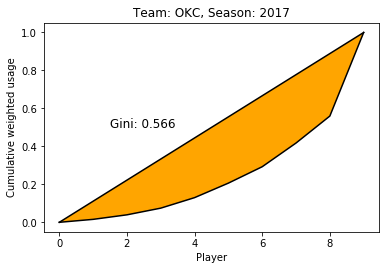

In [58]:
plot_gini_season(2017, 'OKC', k=9, n=2)

In [314]:
sas = season_df[season_df['team'] == 'BRK']
sas

,G,GS,age,ast,blk,drb,efg,fg,fg2,fg2_pct,...,orb,pf,player,pos,pts,stl,team,tov,trb,yr
58,82,8,26,85,54,256,0.514,346,343,0.524,...,161,163,Andray Blatche,C,843,86,BRK,123,417,2013
60,74,23,32,76,4,104,0.528,108,24,0.615,...,16,108,Keith Bogans,SG,311,28,BRK,49,120,2013
75,73,2,24,76,16,72,0.485,155,140,0.500,...,32,93,MarShon Brooks,SG,394,34,BRK,69,104,2013
95,14,0,29,5,2,9,0.310,6,5,0.278,...,6,3,Josh Childress,SF,14,2,BRK,0,15,2013
156,80,56,32,43,13,628,0.479,125,125,0.479,...,260,199,Reggie Evans,PF,363,74,BRK,111,888,2013
243,65,21,27,32,33,239,0.448,139,139,0.451,...,126,127,Kris Humphries,PF,375,16,BRK,57,365,2013
253,2,0,25,0,0,1,NaN,0,0,NaN,...,0,0,Damion James,SF,0,0,BRK,0,1,2013
271,72,72,31,253,14,165,0.493,445,297,0.452,...,53,99,Joe Johnson,SG,1170,49,BRK,123,218,2013
289,4,0,24,0,0,2,0.000,0,0,0.000,...,0,1,Kris Joseph,SF,2,3,BRK,0,2,2013
321,74,74,24,70,154,304,0.521,570,570,0.522,...,208,152,Brook Lopez,C,1437,33,BRK,131,512,2013


In [383]:
links = ['data/season_data/season_data_' + str(yr) + '.xlsx' for yr in range(1986, 2018)]
season_df = pd.read_excel(links[-1])

In [384]:
teams = np.unique(season_df['team'])
teams = teams[teams != 'TOT']

In [385]:
teams

array([u'ATL', u'BOS', u'BRK', u'CHI', u'CHO', u'CLE', u'DAL', u'DEN',
       u'DET', u'GSW', u'HOU', u'IND', u'LAC', u'LAL', u'MEM', u'MIA',
       u'MIL', u'MIN', u'NOP', u'NYK', u'OKC', u'ORL', u'PHI', u'PHO',
       u'POR', u'SAC', u'SAS', u'TOR', u'UTA', u'WAS'], dtype=object)

In [392]:
season_ginis = pd.DataFrame()
for link in links:
    yr = int(link[29:33])
    season_df = pd.read_excel(link)
    teams = np.unique(season_df['team'])
    teams = teams[teams != 'TOT']
    for team in teams:
        for n in range(1,5):
            print team, yr, n
            gini_2 = get_gini_season(season_df, team, k=2, n=n)
            gini_3 = get_gini_season(season_df, team, k=3, n=n)
            gini_4 = get_gini_season(season_df, team, k=4, n=n)
            gini_5 = get_gini_season(season_df, team, k=5, n=n)
            gini_6 = get_gini_season(season_df, team, k=6, n=n)
            gini_7 = get_gini_season(season_df, team, k=7, n=n)
            gini_8 = get_gini_season(season_df, team, k=8, n=n)
            gini_9 = get_gini_season(season_df, team, k=9, n=n)
            gini_10 = get_gini_season(season_df, team, k=10, n=n)
            season_ginis = season_ginis.append({'team': team,
                                                'season': yr,
                                                'gini_2': gini_2,
                                                'gini_3': gini_3,
                                                'gini_4': gini_4,
                                                'gini_5': gini_5,
                                                'gini_6': gini_6,
                                                'gini_7': gini_7,
                                                'gini_8': gini_8,
                                                'gini_9': gini_9,
                                                'gini_10': gini_10,
                                                'mp_power': n
                                               }, 
                                               ignore_index=True)
season_ginis.to_excel('data/season_ginis/ginis_all_mps.xlsx')

ATL 1986 1
ATL 1986 2
ATL 1986 3
ATL 1986 4
BOS 1986 1
BOS 1986 2
BOS 1986 3
BOS 1986 4
CHI 1986 1
CHI 1986 2
CHI 1986 3
CHI 1986 4
CLE 1986 1
CLE 1986 2
CLE 1986 3
CLE 1986 4
DAL 1986 1
DAL 1986 2
DAL 1986 3
DAL 1986 4
DEN 1986 1
DEN 1986 2
DEN 1986 3
DEN 1986 4
DET 1986 1
DET 1986 2
DET 1986 3
DET 1986 4
GSW 1986 1
GSW 1986 2
GSW 1986 3
GSW 1986 4
HOU 1986 1
HOU 1986 2
HOU 1986 3
HOU 1986 4
IND 1986 1
IND 1986 2
IND 1986 3
IND 1986 4
LAC 1986 1
LAC 1986 2
LAC 1986 3
LAC 1986 4
LAL 1986 1
LAL 1986 2
LAL 1986 3
LAL 1986 4
MIL 1986 1
MIL 1986 2
MIL 1986 3
MIL 1986 4
NJN 1986 1
NJN 1986 2
NJN 1986 3
NJN 1986 4
NYK 1986 1
NYK 1986 2
NYK 1986 3
NYK 1986 4
PHI 1986 1
PHI 1986 2
PHI 1986 3
PHI 1986 4
PHO 1986 1
PHO 1986 2
PHO 1986 3
PHO 1986 4
POR 1986 1
POR 1986 2
POR 1986 3
POR 1986 4
SAC 1986 1
SAC 1986 2
SAC 1986 3
SAC 1986 4
SAS 1986 1
SAS 1986 2
SAS 1986 3
SAS 1986 4
SEA 1986 1
SEA 1986 2
SEA 1986 3
SEA 1986 4
UTA 1986 1
UTA 1986 2
UTA 1986 3
UTA 1986 4
WSB 1986 1
WSB 1986 2
WSB 1986 3

In [318]:
#season_ginis.to_excel('data/gini_test.xlsx')

## Match up ginis with wins/playoff results

In [55]:
s_res = pd.read_excel('data/nba_results.xlsx')

In [56]:
s_res.head()

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs
0,Boston Celtics,53,29,0.646,48,34,108.0,105.4,2017,BOS,3
1,Cleveland Cavaliers,51,31,0.622,49,33,110.3,107.2,2017,CLE,4
2,Toronto Raptors,51,31,0.622,52,30,106.9,102.6,2017,TOR,2
3,Washington Wizards,49,33,0.598,46,36,109.2,107.4,2017,WAS,2
4,Atlanta Hawks,43,39,0.524,39,43,103.2,104.0,2017,ATL,1


In [57]:
season_ginis = pd.read_excel('data/season_ginis/ginis_all_mps.xlsx')

In [58]:
season_ginis.head()

,gini_10,gini_2,gini_3,gini_4,gini_5,gini_6,gini_7,gini_8,gini_9,mp_power,season,team
0,0.339135,0.380267,0.304095,0.316359,0.306978,0.291840,0.280668,0.301138,0.312267,1,1986,ATL
1,0.543621,0.440636,0.382926,0.423777,0.442069,0.447969,0.465961,0.471541,0.504979,2,1986,ATL
2,0.683751,0.479867,0.463298,0.521441,0.557209,0.577763,0.592760,0.613532,0.649450,3,1986,ATL
3,0.775577,0.517269,0.534300,0.603199,0.648626,0.677483,0.692340,0.717915,0.748871,4,1986,ATL
4,0.365158,0.209956,0.163032,0.132804,0.176912,0.220609,0.244525,0.273521,0.326804,1,1986,BOS


In [59]:
season_ginis_mp1 = season_ginis[season_ginis['mp_power'] == 1]
season_ginis_mp2 = season_ginis[season_ginis['mp_power'] == 2]
season_ginis_mp3 = season_ginis[season_ginis['mp_power'] == 3]
season_ginis_mp4 = season_ginis[season_ginis['mp_power'] == 4]

In [60]:
print len(s_res) == len(season_ginis_mp1)
print len(s_res) == len(season_ginis_mp2)
print len(s_res) == len(season_ginis_mp3)
print len(s_res) == len(season_ginis_mp4)

True
True
True
True


In [61]:
var = 'gini_5'
temp = season_ginis_mp3[(season_ginis_mp3['team'] == 'BOS') & (season_ginis_mp3['season'] == 2017)]
temp[var].values[0]

0.33469904716767501

In [62]:
temp = season_ginis_mp2[(season_ginis_mp2['team'] == str(s_res.iloc[0].abbr)) & (season_ginis_mp2['season'] == s_res.iloc[0].yr)]
gini_lst.append(temp['gini_9'].values[0])

In [63]:
temp

,gini_10,gini_2,gini_3,gini_4,gini_5,gini_6,gini_7,gini_8,gini_9,mp_power,season,team
3513,0.43568,0.3487,0.302764,0.261507,0.266965,0.314213,0.35426,0.380041,0.403318,2,2017,BOS


In [64]:
s_res.iloc[0].yr

2017

In [65]:
gini_lst = []
for i in range(len(s_res)):
    #print i
    temp = season_ginis_mp2[(season_ginis_mp2['team'] == str(s_res.iloc[i].abbr)) & (season_ginis_mp2['season'] == s_res.iloc[i].yr)]
    #print temp
    gini_lst.append(temp['gini_9'].values[0])

In [66]:
temp = season_ginis_mp2[(season_ginis_mp2['team'] == str(s_res.iloc[i].abbr)) & (season_ginis_mp2['season'] == s_res.iloc[i].yr)]

In [67]:
temp

,gini_10,gini_2,gini_3,gini_4,gini_5,gini_6,gini_7,gini_8,gini_9,mp_power,season,team
29,0.493416,0.127002,0.092798,0.169099,0.224609,0.292838,0.335057,0.397304,0.442819,2,1986,GSW


In [68]:
s_res['gini'] = gini_lst

In [69]:
split = 2003
s_res_recent = s_res[s_res['yr'] >= split]
s_res_past = s_res[s_res['yr'] < split]

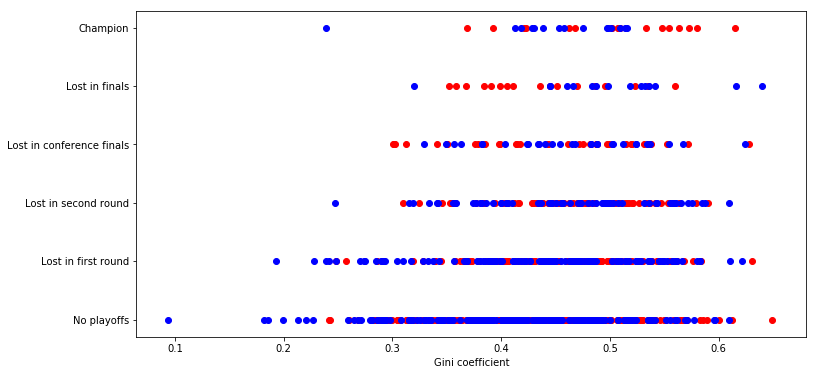

In [70]:
plt.figure(figsize=(12,6))
plt.scatter(s_res_past['gini'], s_res_past['playoffs'], c='r')
plt.scatter(s_res_recent['gini'], s_res_recent['playoffs'], c='b')
plt.yticks( range(6), ('No playoffs', 'Lost in first round', 'Lost in second round', 
                       'Lost in conference finals', 'Lost in finals', 'Champion') )
plt.xlabel('Gini coefficient')
plt.show()

In [9]:
def plot_gini_playoff(k, n):
    var = 'gini_' + str(k)
    s_res = pd.read_excel('data/nba_results.xlsx')
    season_ginis = pd.read_excel('data/season_ginis/ginis_all_mps.xlsx')
    season_ginis_mp = season_ginis[season_ginis['mp_power'] == n]
    gini_lst = []
    for i in range(len(s_res)):
        #print i
        temp = season_ginis_mp[(season_ginis_mp['team'] == str(s_res.iloc[i].abbr)) & (season_ginis_mp['season'] == s_res.iloc[i].yr)]
        #print temp
        gini_lst.append(temp[var].values[0])
    s_res['gini'] = gini_lst
    
    split = 2003
    s_res_recent = s_res[s_res['yr'] >= split]
    s_res_past = s_res[s_res['yr'] < split]
    plt.figure(figsize=(10,5))
    #plt.scatter(s_res_past['gini'], s_res_past['playoffs'], c='r')
    plt.scatter(s_res_recent['gini'], s_res_recent['playoffs'], c='b')
    plt.yticks( range(6), ('No playoffs', 'Lost in first round', 'Lost in second round', 
                       'Lost in conference finals', 'Lost in finals', 'Champion') )
    plt.xlabel('Gini coefficient')
    plt.title('Gini vs. Playoff Success (k=' + str(k) + ', n=' + str(n) + ')')
    #plt.savefig('plots/testplot.png')
    plt.savefig('plots/gini_season_playoff_k' + str(k) + '_n' + str(n) +'.png', bbox_inches='tight')
    plt.show()

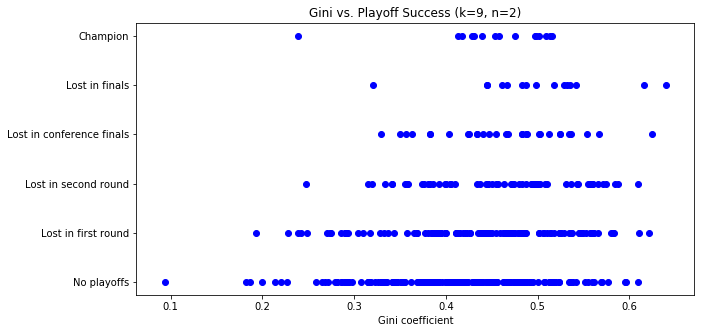

In [72]:
plot_gini_playoff(k=9, n=2)

In [10]:
def plot_gini_wins(k, n):
    var = 'gini_' + str(k)
    s_res = pd.read_excel('data/nba_results.xlsx')
    season_ginis = pd.read_excel('data/season_ginis/ginis_all_mps.xlsx')
    season_ginis_mp = season_ginis[season_ginis['mp_power'] == n]
    gini_lst = []
    for i in range(len(s_res)):
        #print i
        temp = season_ginis_mp[(season_ginis_mp['team'] == str(s_res.iloc[i].abbr)) & (season_ginis_mp['season'] == s_res.iloc[i].yr)]
        #print temp
        gini_lst.append(temp[var].values[0])
    s_res['gini'] = gini_lst
    
    split = 2003
    s_res_recent = s_res[s_res['yr'] >= split]
    s_res_past = s_res[s_res['yr'] < split]
    plt.figure(figsize=(10,5))
    #plt.scatter(s_res_past['gini'], s_res_past['playoffs'], c='r')
    plt.scatter(s_res_recent['gini'], s_res_recent['W'], c='b')
    plt.ylabel('Wins')
    plt.xlabel('Gini coefficient')
    plt.title('Gini vs. Regular Season Wins (k=' + str(k) + ', n=' + str(n) + ')')
    #plt.savefig('plots/testplot.png')
    plt.savefig('plots/gini_season_wins_k' + str(k) + '_n' + str(n) +'.png', bbox_inches='tight')
    plt.show()

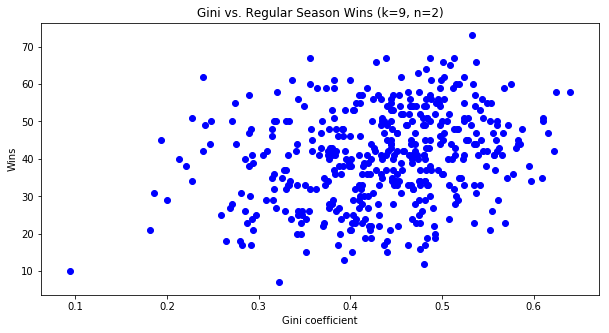

In [74]:
plot_gini_wins(k=9, n=2)

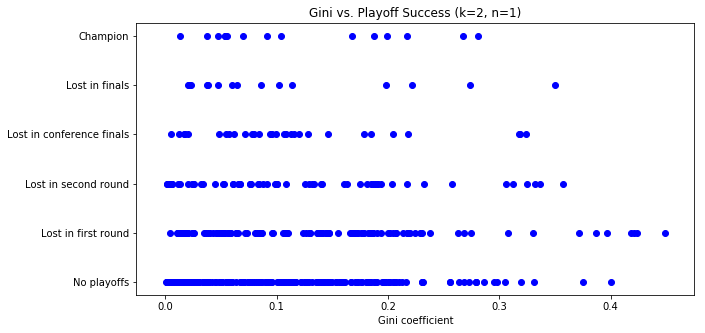

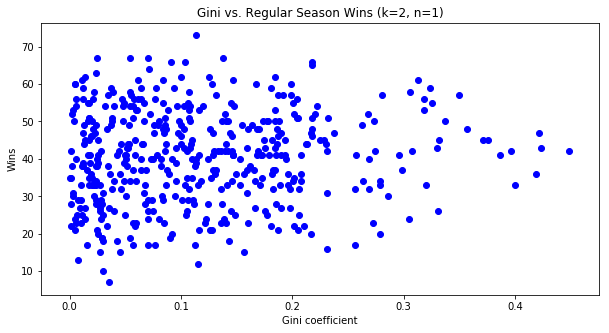

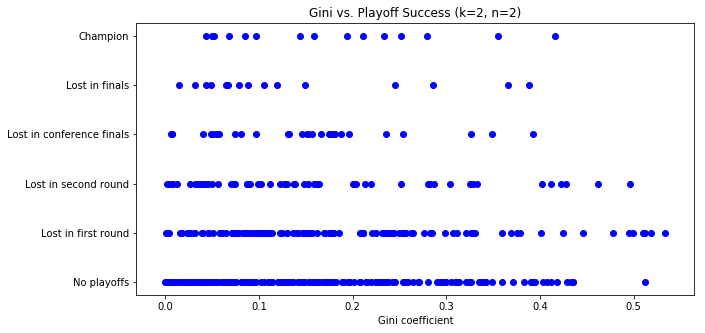

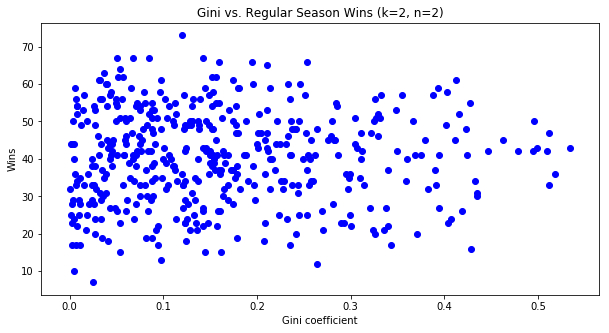

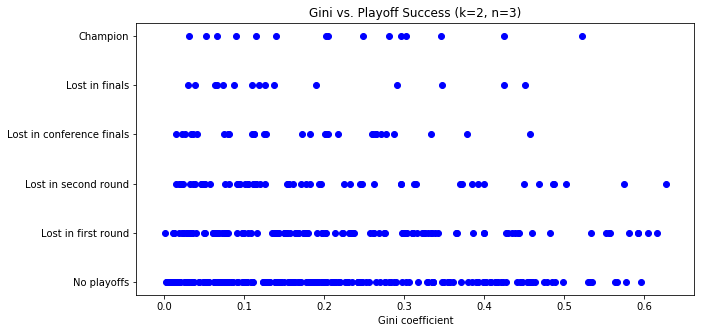

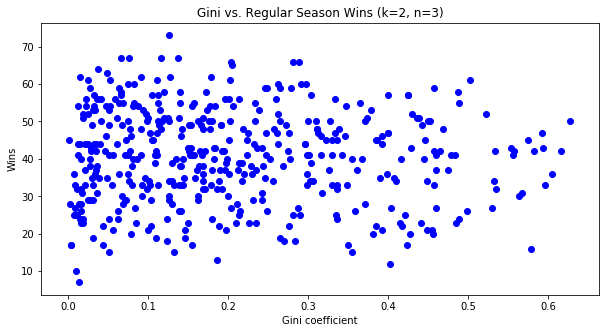

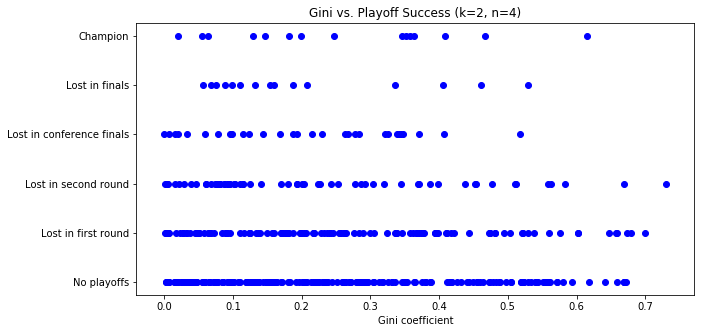

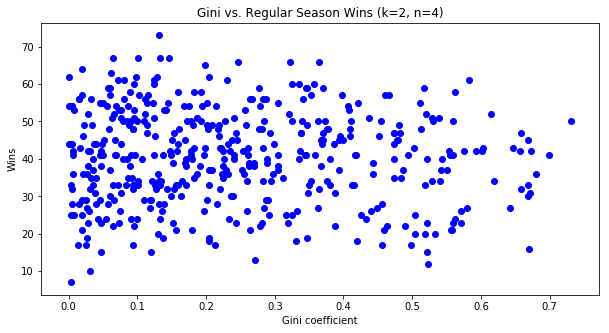

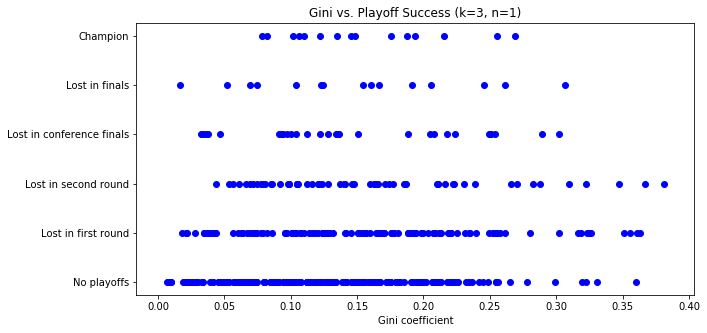

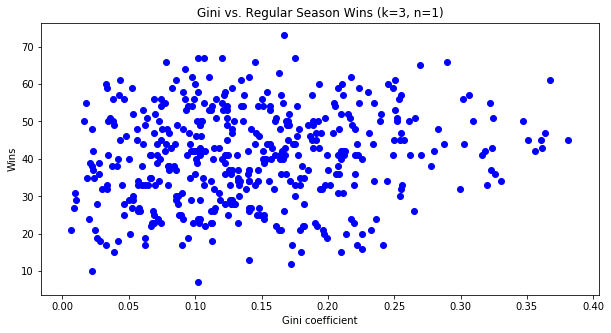

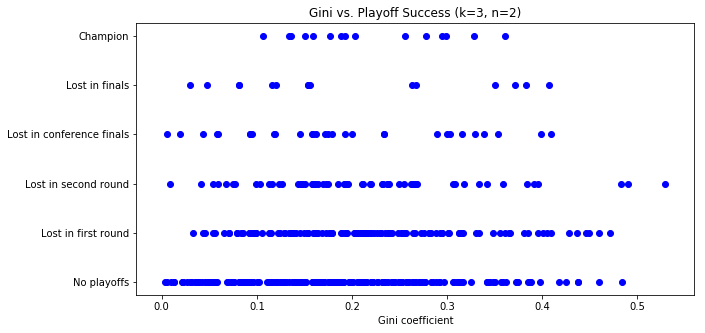

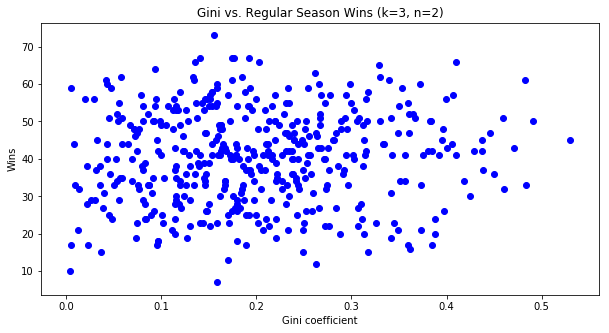

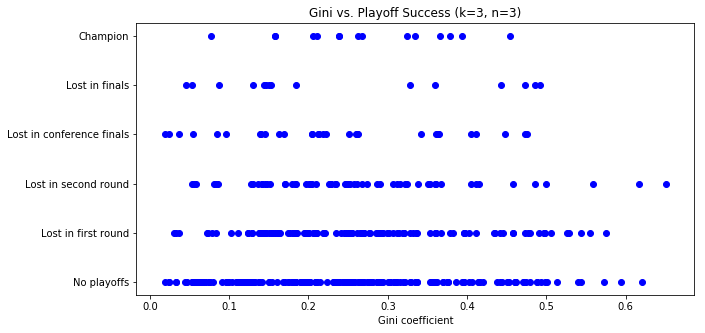

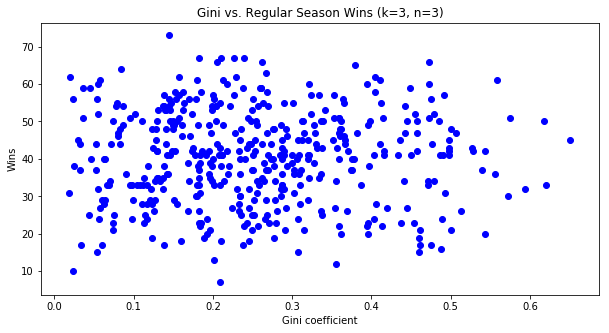

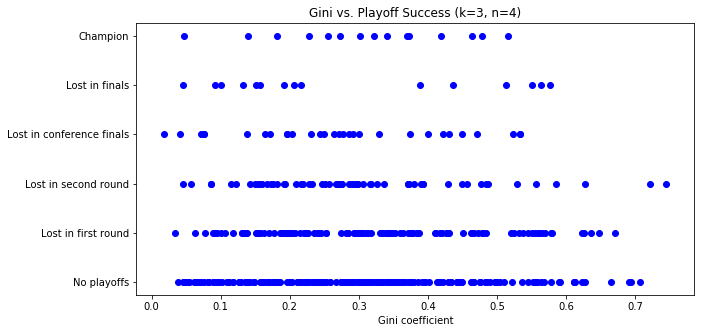

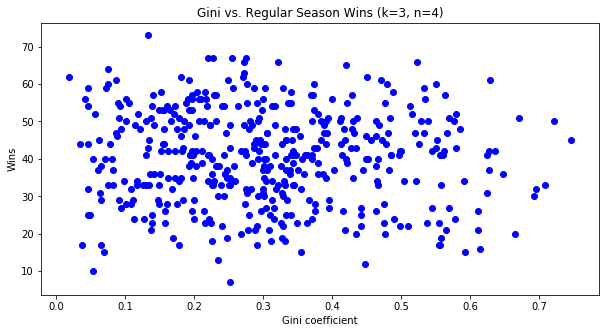

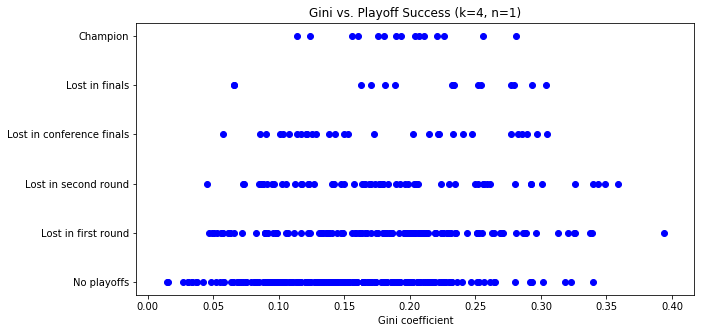

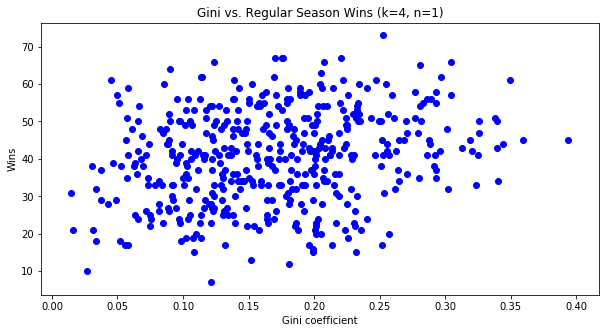

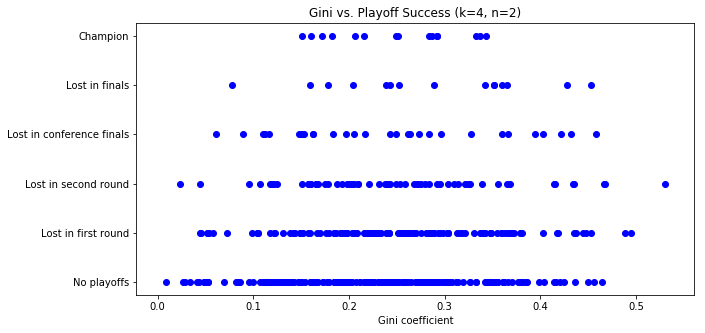

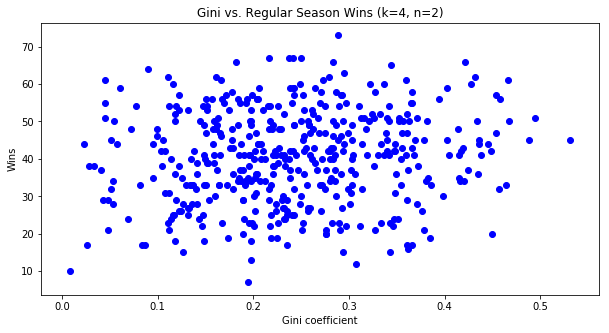

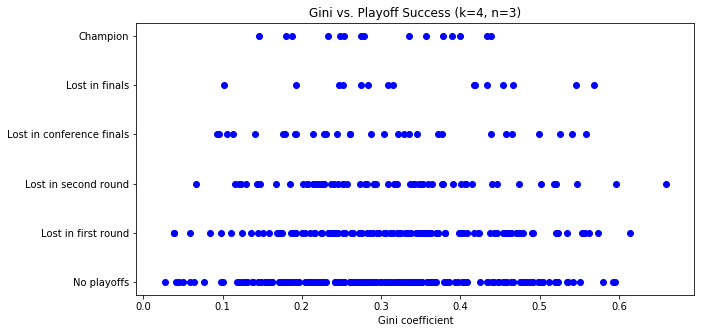

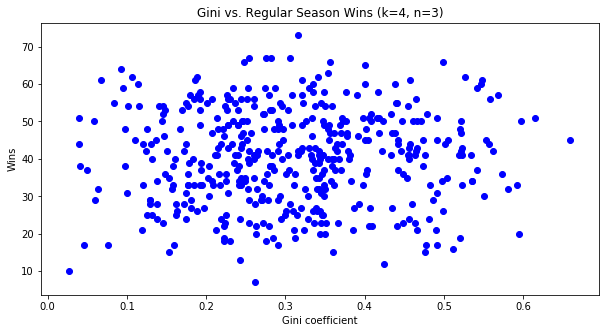

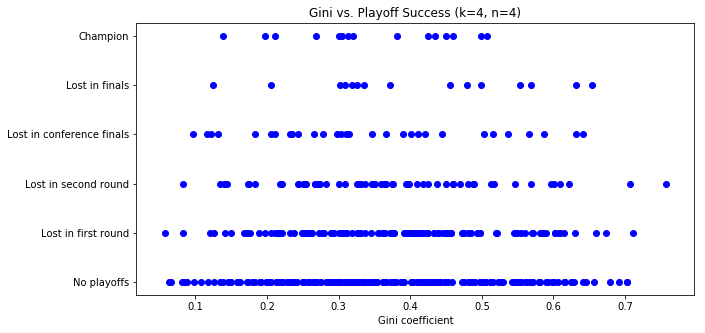

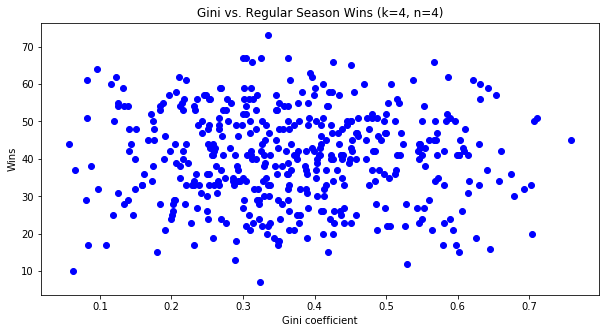

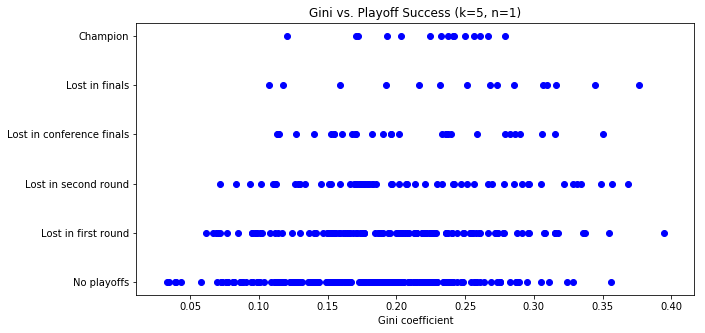

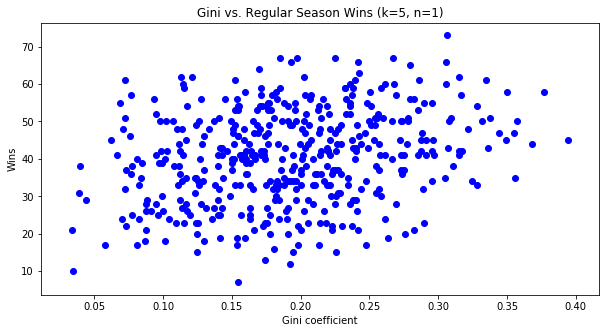

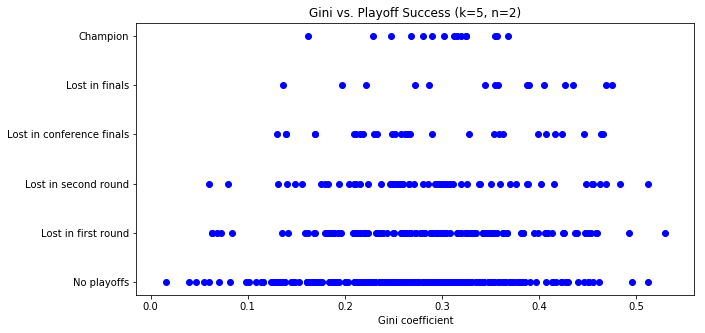

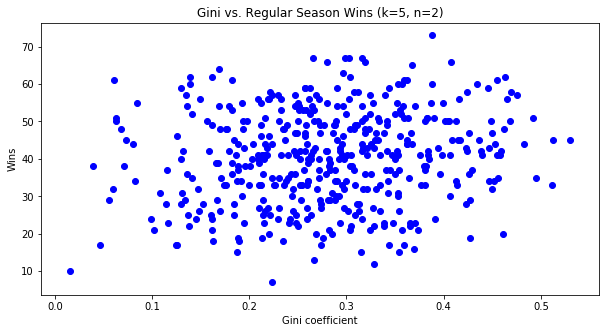

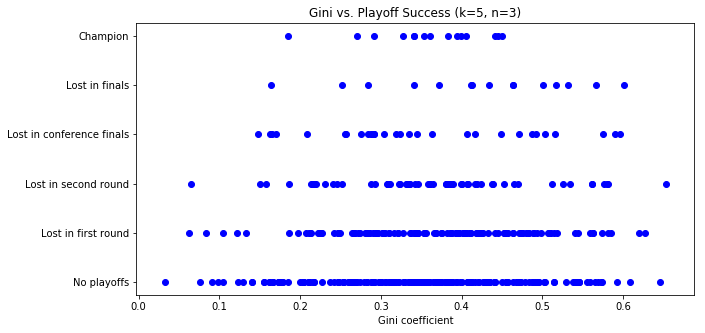

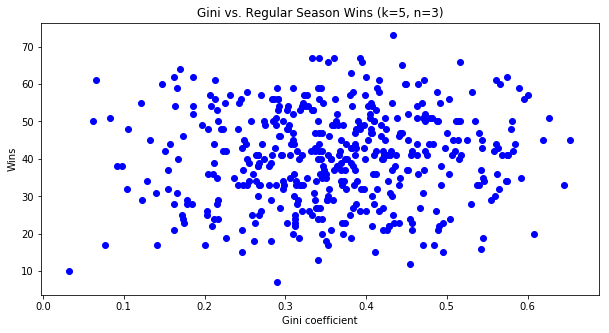

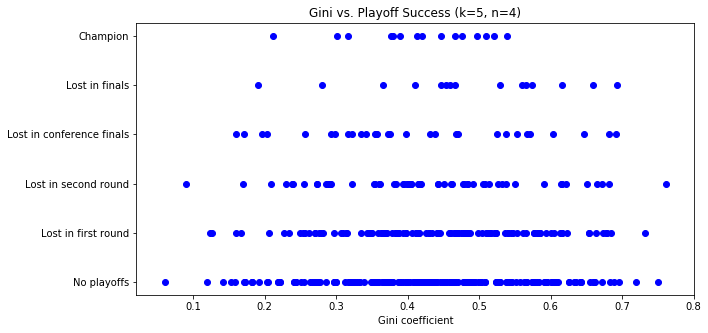

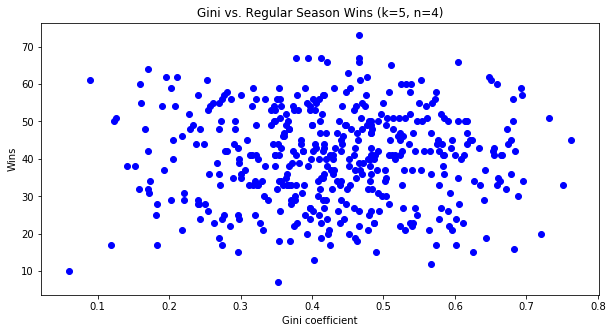

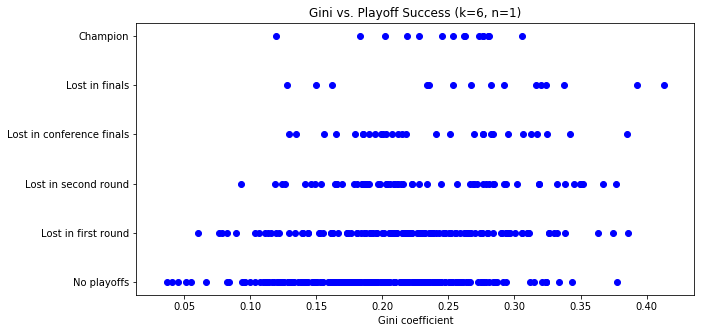

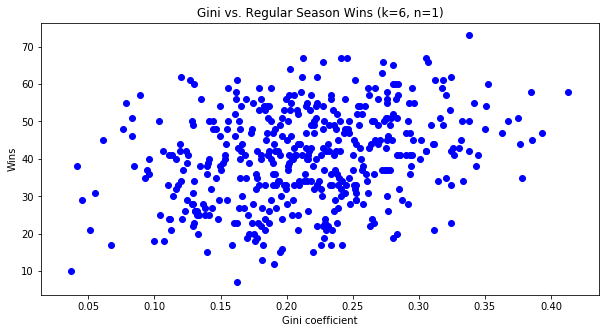

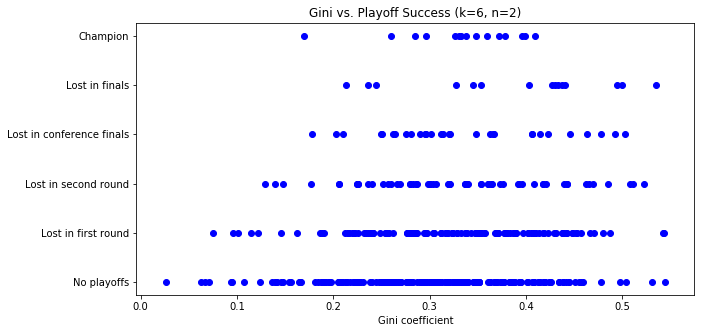

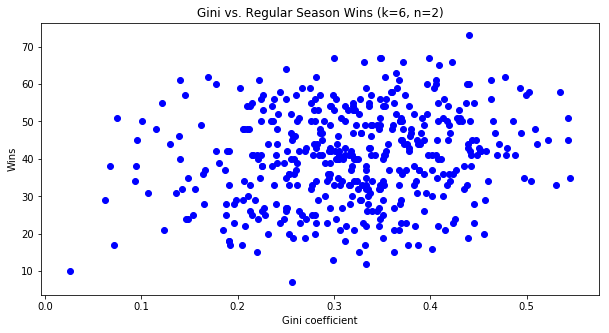

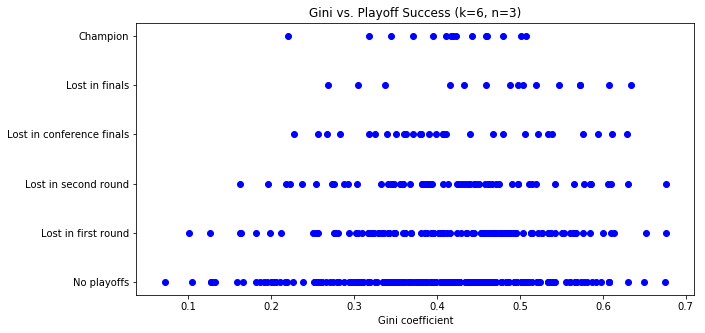

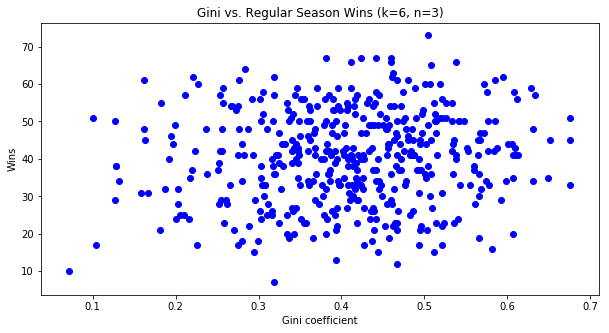

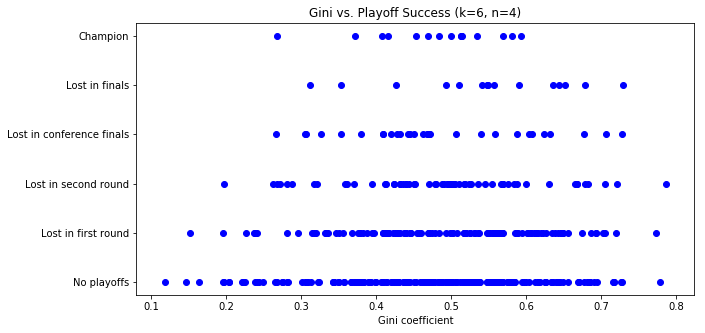

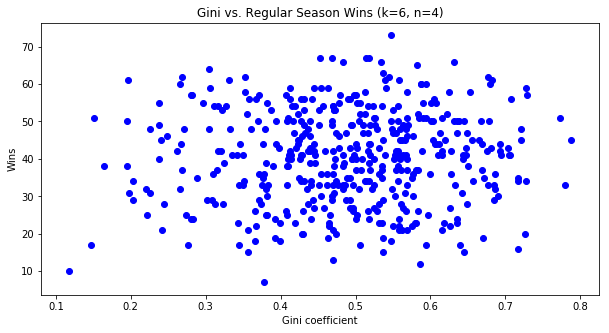

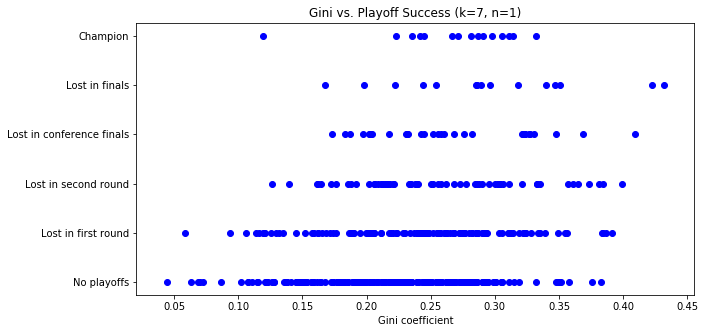

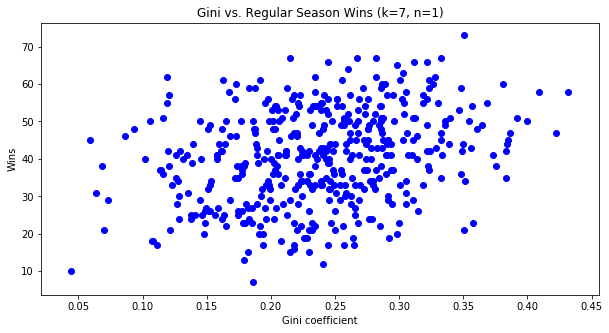

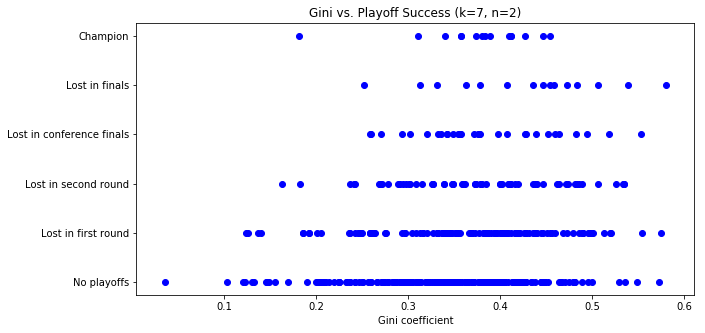

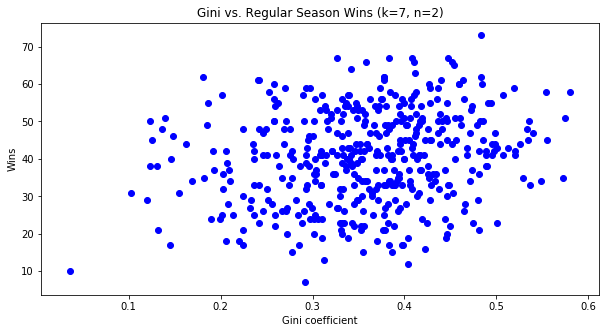

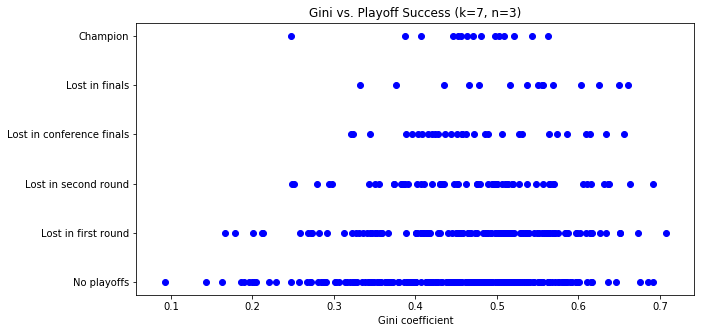

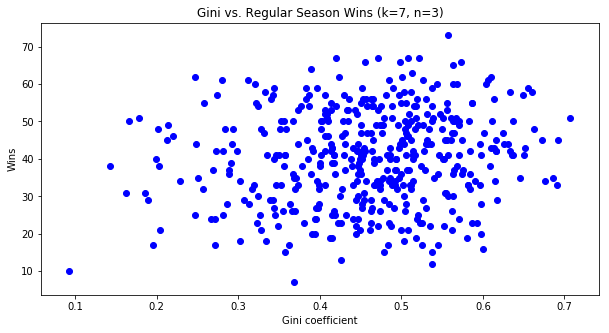

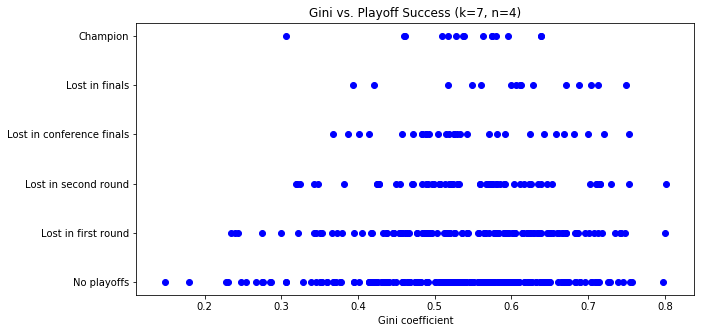

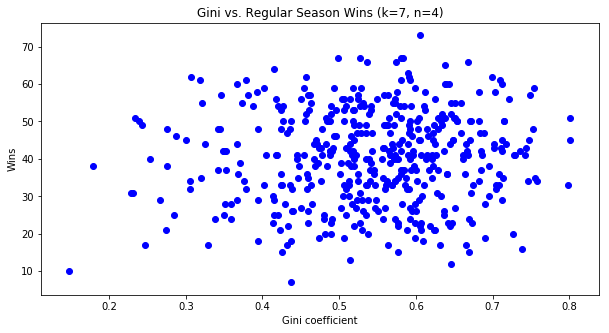

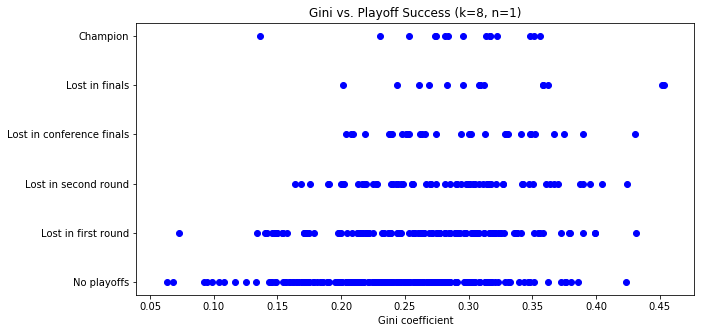

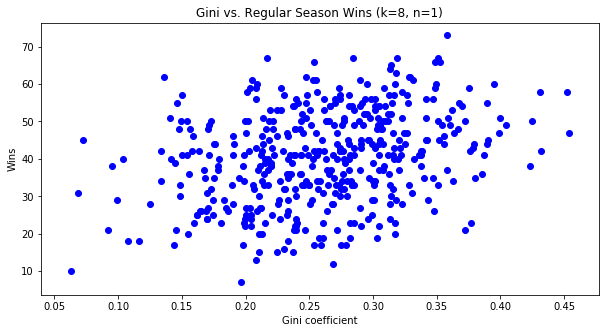

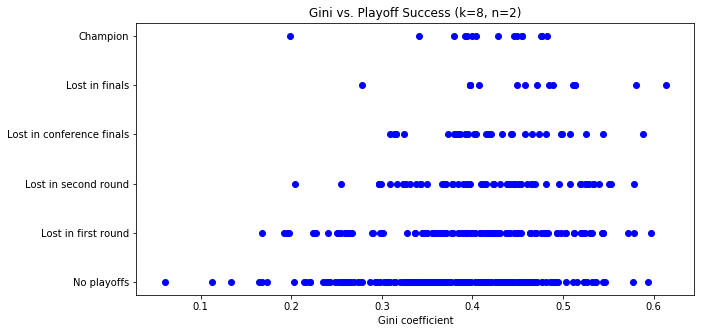

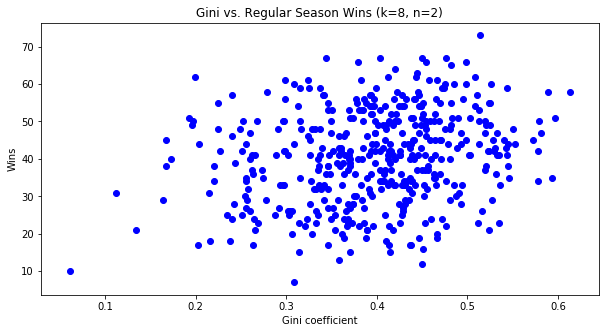

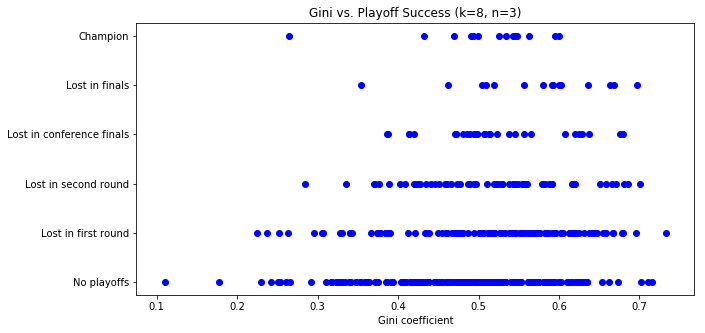

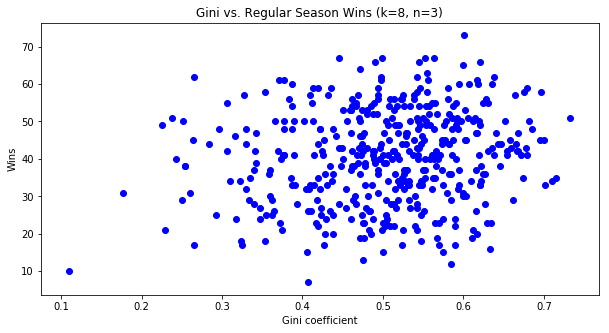

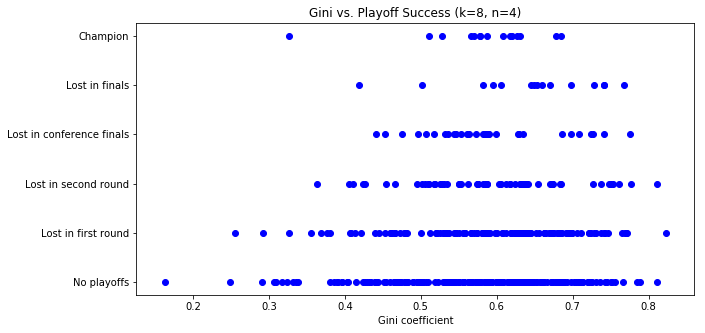

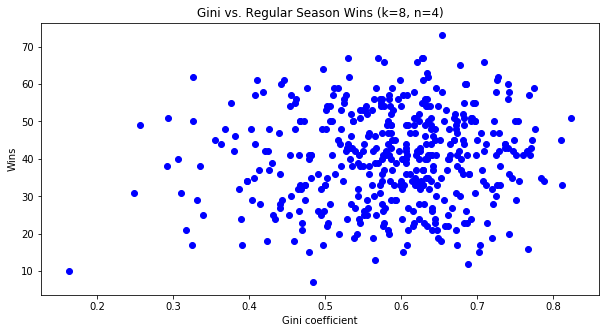

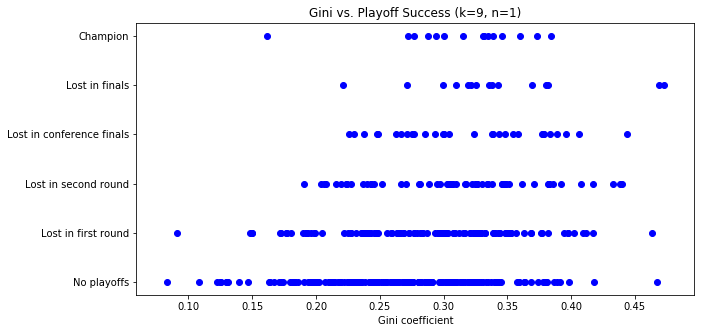

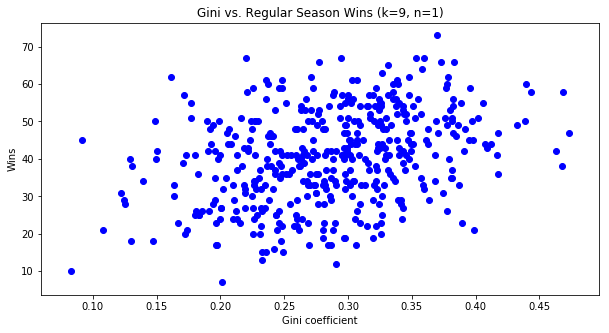

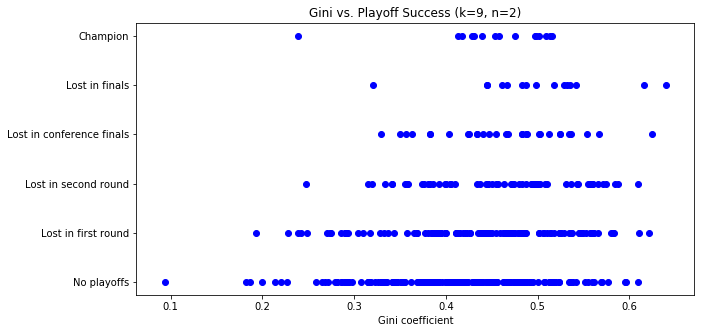

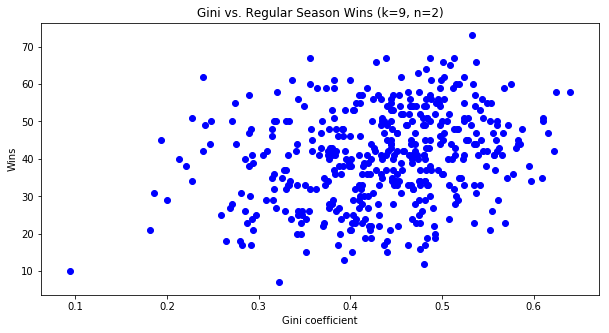

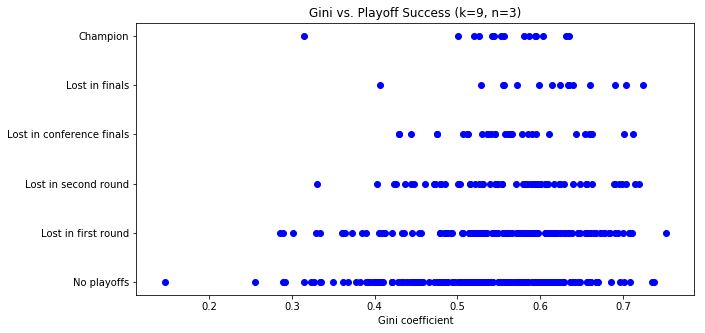

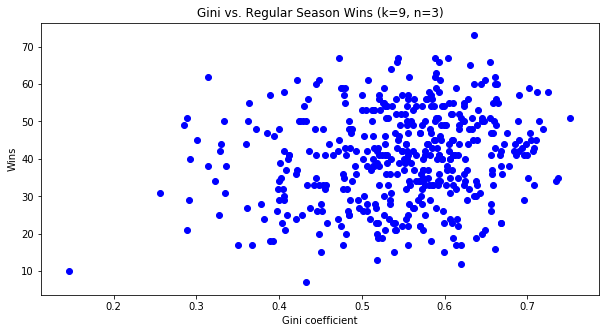

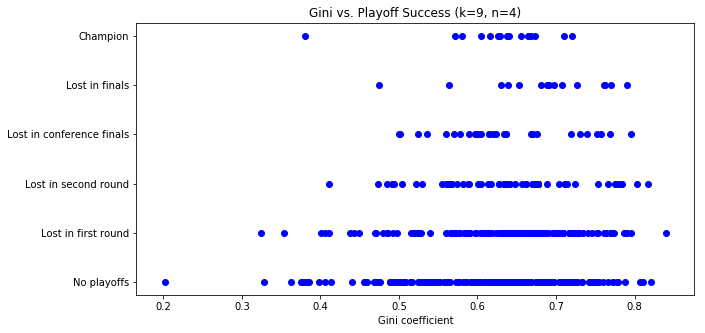

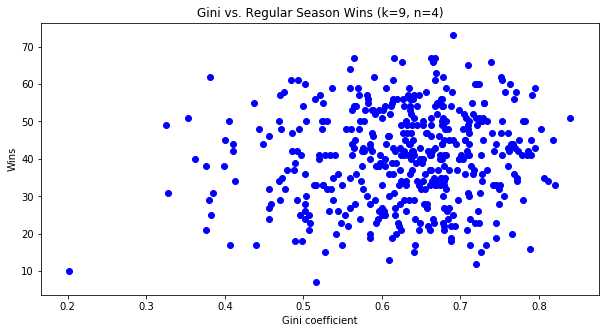

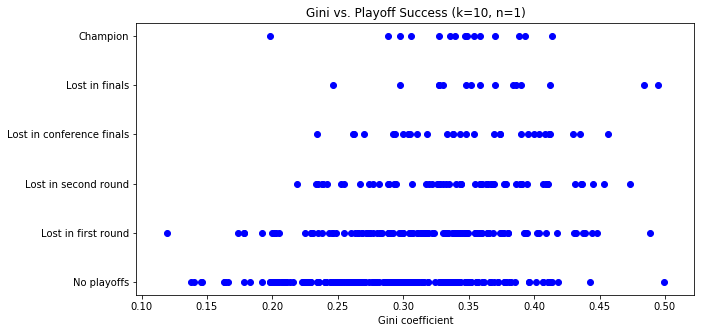

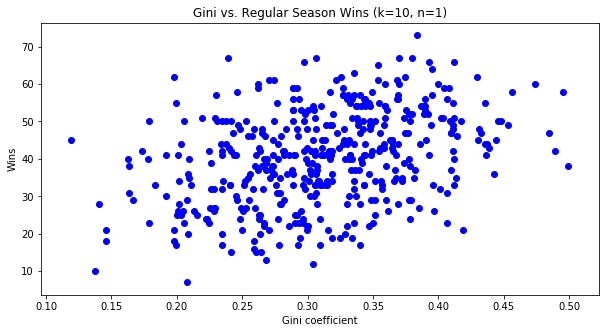

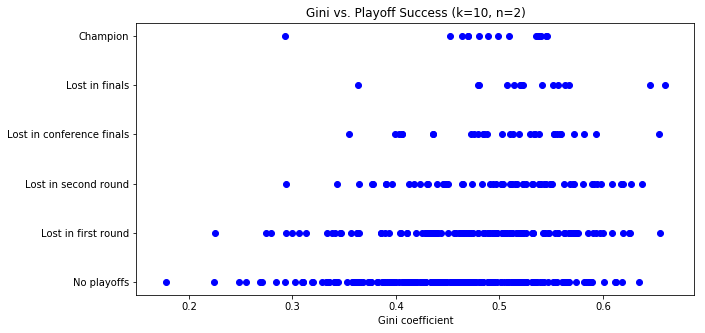

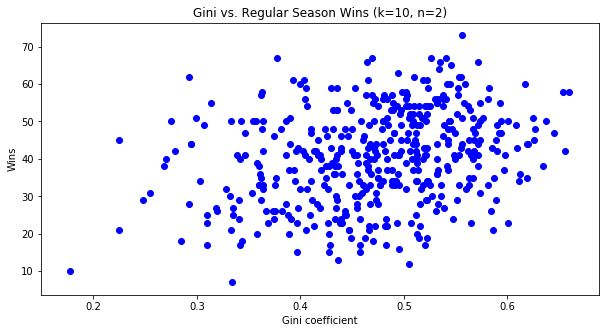

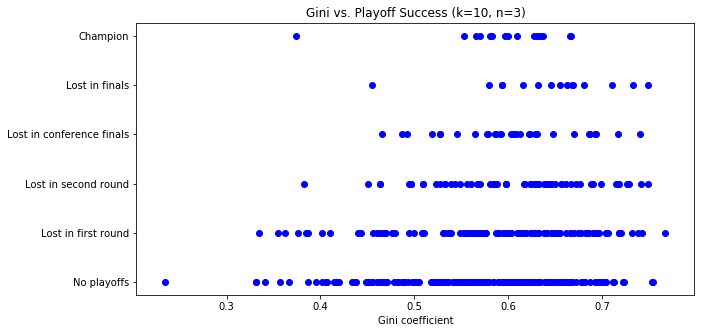

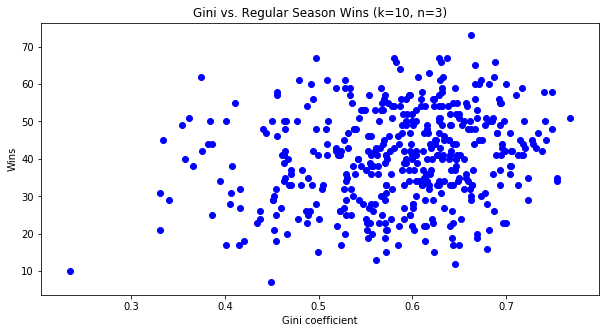

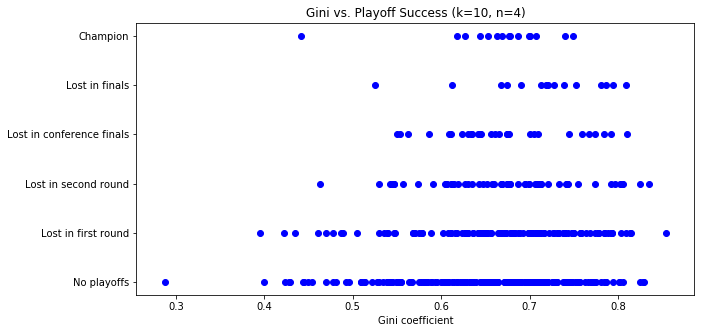

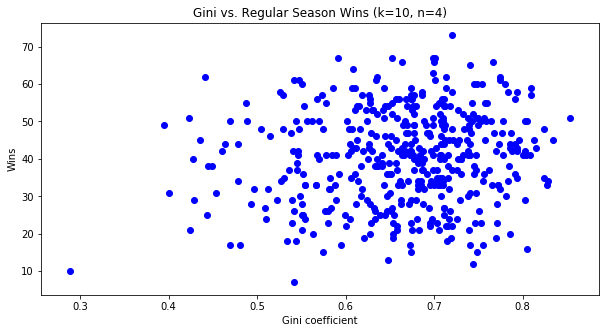

In [47]:
for k in range(2,11):
    for n in range(1,5):
        plot_gini_playoff(k, n)
        plot_gini_wins(k, n)

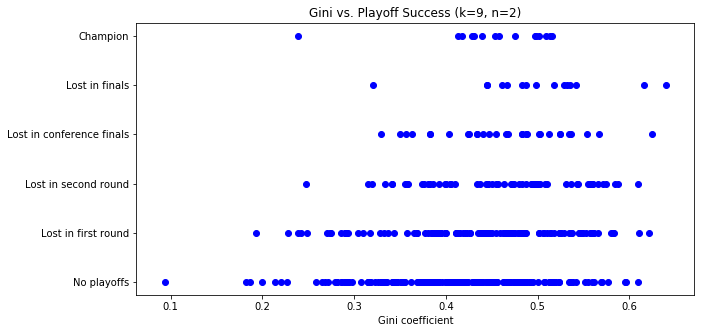

In [47]:
# k = 9, n = 2
k = 9
n = 2
var = 'gini_' + str(k)
s_res = pd.read_excel('data/nba_results.xlsx')
season_ginis = pd.read_excel('data/season_ginis/ginis_all_mps.xlsx')
season_ginis_mp = season_ginis[season_ginis['mp_power'] == n]
gini_lst = []
for i in range(len(s_res)):
    #print i
    temp = season_ginis_mp[(season_ginis_mp['team'] == str(s_res.iloc[i].abbr)) & (season_ginis_mp['season'] == s_res.iloc[i].yr)]
    #print temp
    gini_lst.append(temp[var].values[0])
s_res['gini'] = gini_lst

split = 2003
s_res_recent = s_res[s_res['yr'] >= split]
s_res_past = s_res[s_res['yr'] < split]
plt.figure(figsize=(10,5))
#plt.scatter(s_res_past['gini'], s_res_past['playoffs'], c='r')
plt.scatter(s_res_recent['gini'], s_res_recent['playoffs'], c='b')
plt.yticks( range(6), ('No playoffs', 'Lost in first round', 'Lost in second round', 
                   'Lost in conference finals', 'Lost in finals', 'Champion') )
plt.xlabel('Gini coefficient')
plt.title('Gini vs. Playoff Success (k=' + str(k) + ', n=' + str(n) + ')')
#plt.savefig('plots/testplot.png')
plt.show()

In [48]:
s_res.head()

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,gini
0,Boston Celtics,53,29,0.646,48,34,108.0,105.4,2017,BOS,3,0.403318
1,Cleveland Cavaliers,51,31,0.622,49,33,110.3,107.2,2017,CLE,4,0.528607
2,Toronto Raptors,51,31,0.622,52,30,106.9,102.6,2017,TOR,2,0.483215
3,Washington Wizards,49,33,0.598,46,36,109.2,107.4,2017,WAS,2,0.531189
4,Atlanta Hawks,43,39,0.524,39,43,103.2,104.0,2017,ATL,1,0.426169


In [50]:
zip(s_res_recent['gini'], s_res_recent['playoffs'])

[(0.403318159775437, 3),
 (0.528606959778565, 4),
 (0.483215020407093, 2),
 (0.531188818663623, 2),
 (0.426168517223039, 1),
 (0.426508323134706, 1),
 (0.458528184364907, 1),
 (0.47277109282025, 1),
 (0.377739489667386, 0),
 (0.330368010777501, 0),
 (0.418667899411252, 0),
 (0.42449945824512, 0),
 (0.315211211506254, 0),
 (0.271446637243364, 0),
 (0.346044664783035, 0),
 (0.513438415982254, 5),
 (0.382181781836629, 3),
 (0.497093964512196, 2),
 (0.382595970699958, 2),
 (0.227753911892283, 1),
 (0.56597861783515, 1),
 (0.377498173462599, 1),
 (0.480805806535668, 1),
 (0.213174208669697, 0),
 (0.481700607964162, 0),
 (0.476314592493783, 0),
 (0.329566589985304, 0),
 (0.536730578154018, 0),
 (0.343494793428588, 0),
 (0.467076425569492, 0),
 (0.453329394920923, 5),
 (0.465129185982386, 3),
 (0.37667150863925, 2),
 (0.39240637279942, 2),
 (0.445301107425419, 1),
 (0.384853878709024, 1),
 (0.444266703858648, 1),
 (0.443971070467511, 1),
 (0.384476401239406, 0),
 (0.409968428107014, 0),
 (0.3

In [51]:
tier0 = s_res_recent[s_res_recent['playoffs'] == 0]
tier1 = s_res_recent[s_res_recent['playoffs'] == 1]
tier2 = s_res_recent[s_res_recent['playoffs'] == 2]
tier3 = s_res_recent[s_res_recent['playoffs'] == 3]
tier4 = s_res_recent[s_res_recent['playoffs'] == 4]
tier5 = s_res_recent[s_res_recent['playoffs'] == 5]

In [55]:
print np.var(tier0['gini'])
print np.var(tier1['gini'])
print np.var(tier2['gini'])
print np.var(tier3['gini'])
print np.var(tier4['gini'])
print np.var(tier5['gini'])

0.00731435200037
0.00812662736224
0.00649594894197
0.0048293395883
0.00530920017919
0.00449288957004


In [82]:
np.median(tier2['gini'])

0.47134725558984003

In [70]:
stats.iqr(tier2['gini'])

0.1107083278458848

In [11]:
def get_summary_stats(tier_num):
    tier = s_res_recent[s_res_recent['playoffs'] == tier_num]
    mean = np.mean(tier['gini'])
    var = np.var(tier['gini'])
    iqr = stats.iqr(tier['gini'])
    print 'Mean: ' + str(round(mean, 3)) + ', Var: ' + str(round(var, 3)) + ', IQR: ' + str(round(iqr, 3))
    return mean, var, iqr

In [74]:
for i in range(6):
    get_summary_stats(i)

Mean: 0.413, Var: 0.007, IQR: 0.114
Mean: 0.439, Var: 0.008, IQR: 0.112
Mean: 0.459, Var: 0.006, IQR: 0.111
Mean: 0.463, Var: 0.005, IQR: 0.086
Mean: 0.501, Var: 0.005, IQR: 0.071
Mean: 0.453, Var: 0.004, IQR: 0.07


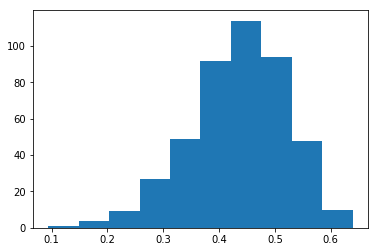

In [89]:
plt.hist(s_res_recent['gini'])
plt.show()

In [90]:
mean = np.mean(s_res_recent['gini'])
var = np.var(s_res_recent['gini'])
iqr = stats.iqr(s_res_recent['gini'])
print 'Mean: ' + str(round(mean, 3)) + ', Var: ' + str(round(var, 3)) + ', IQR: ' + str(round(iqr, 3))

Mean: 0.434, Var: 0.008, IQR: 0.11


In [105]:
t5_clean = [x for x in list(tier5['gini'].values) if x > 0.3]
#t5_clean = np.array(t5_clean)

In [106]:
mean = np.mean(t5_clean)
var = np.var(t5_clean)
iqr = stats.iqr(t5_clean)
print 'Mean: ' + str(round(mean, 3)) + ', Var: ' + str(round(var, 3)) + ', IQR: ' + str(round(iqr, 3))

Mean: 0.468, Var: 0.001, IQR: 0.068


In [50]:
# k = 9, n = 2
k = 9
n = 2
var = 'gini_' + str(k)
s_res = pd.read_excel('data/nba_results.xlsx')
season_ginis = pd.read_excel('data/season_ginis/ginis_all_mps.xlsx')
season_ginis_mp = season_ginis[season_ginis['mp_power'] == n]
gini_lst = []
for i in range(len(s_res)):
    #print i
    temp = season_ginis_mp[(season_ginis_mp['team'] == str(s_res.iloc[i].abbr)) & (season_ginis_mp['season'] == s_res.iloc[i].yr)]
    #print temp
    gini_lst.append(temp[var].values[0])
s_res['gini'] = gini_lst
s_res = s_res[s_res['yr'] >= 2003]
#split = 2003
#s_res = s_res[s_res['yr'] >= split]
#s_res_past = s_res[s_res['yr'] < split]
#plt.figure(figsize=(10,5))
#plt.scatter(s_res_past['gini'], s_res_past['playoffs'], c='r')
#plt.scatter(s_res_recent['gini'], s_res_recent['playoffs'], c='b')
#plt.yticks( range(6), ('No playoffs', 'Lost in first round', 'Lost in second round', 
#                   'Lost in conference finals', 'Lost in finals', 'Champion') )
#plt.xlabel('Gini coefficient')
#plt.title('Gini vs. Playoff Success (k=' + str(k) + ', n=' + str(n) + ')')
#plt.savefig('plots/testplot.png')
#plt.show()

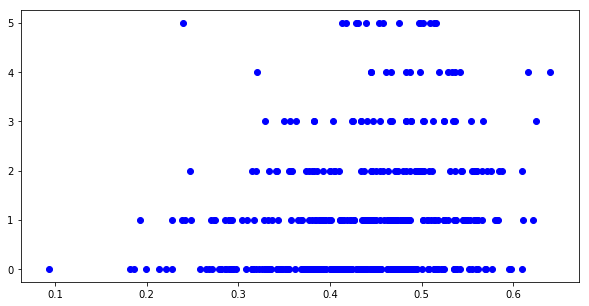

In [51]:
plt.figure(figsize=(10,5))
plt.scatter(s_res['gini'], s_res['playoffs'], c='b')
plt.show()

In [54]:
df1 = s_res[s_res['gini'] < 0.2]
df2 = s_res[(s_res['gini'] > 0.2) & (s_res['gini'] < 0.3)]
df3 = s_res[(s_res['gini'] > 0.3) & (s_res['gini'] < 0.4)]
df4 = s_res[(s_res['gini'] > 0.4) & (s_res['gini'] < 0.5)]
df5 = s_res[(s_res['gini'] > 0.5) & (s_res['gini'] < 0.6)]
df6 = s_res[s_res['gini'] > 0.6]

In [60]:
print float(sum(df1['playoffs'] == 5))/len(df1)
print float(sum(df2['playoffs'] == 5))/len(df2)
print float(sum(df3['playoffs'] == 5))/len(df3)
print float(sum(df4['playoffs'] == 5))/len(df4)
print float(sum(df5['playoffs'] == 5))/len(df5)
print float(sum(df6['playoffs'] == 5))/len(df6)

0.0
0.030303030303
0.0
0.0478468899522
0.043956043956
0.0


In [61]:
print float(sum(df1['playoffs'] == 5) + sum(df1['playoffs'] == 4))/len(df1)
print float(sum(df2['playoffs'] == 5) + sum(df2['playoffs'] == 4))/len(df2)
print float(sum(df3['playoffs'] == 5) + sum(df3['playoffs'] == 4))/len(df3)
print float(sum(df4['playoffs'] == 5) + sum(df4['playoffs'] == 4))/len(df4)
print float(sum(df5['playoffs'] == 5) + sum(df5['playoffs'] == 4))/len(df5)
print float(sum(df6['playoffs'] == 5) + sum(df6['playoffs'] == 4))/len(df6)

0.0
0.030303030303
0.00970873786408
0.0813397129187
0.0989010989011
0.285714285714


In [62]:
df1 = s_res[s_res['gini'] < 0.2]
df2 = s_res[(s_res['gini'] > 0.2) & (s_res['gini'] < 0.25)]
df3 = s_res[(s_res['gini'] > 0.25) & (s_res['gini'] < 0.3)]
df4 = s_res[(s_res['gini'] > 0.3) & (s_res['gini'] < 0.35)]
df5 = s_res[(s_res['gini'] > 0.35) & (s_res['gini'] < 0.4)]
df6 = s_res[(s_res['gini'] > 0.4) & (s_res['gini'] < 0.45)]
df7 = s_res[(s_res['gini'] > 0.45) & (s_res['gini'] < 0.5)]
df8 = s_res[(s_res['gini'] > 0.5) & (s_res['gini'] < 0.55)]
df9 = s_res[(s_res['gini'] > 0.55) & (s_res['gini'] < 0.6)]
df10 = s_res[s_res['gini'] > 0.6]

In [63]:
print float(sum(df1['playoffs'] == 5))/len(df1)
print float(sum(df2['playoffs'] == 5))/len(df2)
print float(sum(df3['playoffs'] == 5))/len(df3)
print float(sum(df4['playoffs'] == 5))/len(df4)
print float(sum(df5['playoffs'] == 5))/len(df5)
print float(sum(df6['playoffs'] == 5))/len(df6)
print float(sum(df7['playoffs'] == 5))/len(df7)
print float(sum(df8['playoffs'] == 5))/len(df8)
print float(sum(df9['playoffs'] == 5))/len(df9)
print float(sum(df10['playoffs'] == 5))/len(df10)

0.0
0.111111111111
0.0
0.0
0.0
0.05
0.045871559633
0.0645161290323
0.0
0.0


In [65]:
print float(sum(df1['playoffs'] == 5) + sum(df1['playoffs'] == 4))/len(df1)
print float(sum(df2['playoffs'] == 5) + sum(df2['playoffs'] == 4))/len(df2)
print float(sum(df3['playoffs'] == 5) + sum(df3['playoffs'] == 4))/len(df3)
print float(sum(df4['playoffs'] == 5) + sum(df4['playoffs'] == 4))/len(df4)
print float(sum(df5['playoffs'] == 5) + sum(df5['playoffs'] == 4))/len(df5)
print float(sum(df6['playoffs'] == 5) + sum(df6['playoffs'] == 4))/len(df6)
print float(sum(df7['playoffs'] == 5) + sum(df7['playoffs'] == 4))/len(df7)
print float(sum(df8['playoffs'] == 5) + sum(df8['playoffs'] == 4))/len(df8)
print float(sum(df9['playoffs'] == 5) + sum(df9['playoffs'] == 4))/len(df9)
print float(sum(df10['playoffs'] == 5) + sum(df10['playoffs'] == 4))/len(df10)

0.0
0.111111111111
0.0
0.025641025641
0.0
0.07
0.0917431192661
0.145161290323
0.0
0.285714285714


In [66]:
s_res.to_excel('data/nba_results_gini92_forR.xlsx')

In [52]:
s_res.head()

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,gini
0,Boston Celtics,53,29,0.646,48,34,108.0,105.4,2017,BOS,3,0.403318
1,Cleveland Cavaliers,51,31,0.622,49,33,110.3,107.2,2017,CLE,4,0.528607
2,Toronto Raptors,51,31,0.622,52,30,106.9,102.6,2017,TOR,2,0.483215
3,Washington Wizards,49,33,0.598,46,36,109.2,107.4,2017,WAS,2,0.531189
4,Atlanta Hawks,43,39,0.524,39,43,103.2,104.0,2017,ATL,1,0.426169


In [158]:
s_res.to_excel('data/nba_results_gini92.xlsx')

In [80]:
s_res_sort = s_res.sort_values(by=['gini'])

In [42]:
s_res_sort.head()

NameError: name 's_res_sort' is not defined

In [85]:
df25 = s_res_sort.iloc[int(len(s_res_sort) * 0) : int(len(s_res_sort) * .25)]
df50 = s_res_sort.iloc[int(len(s_res_sort) * .25) : int(len(s_res_sort) * .50)]
df75 = s_res_sort.iloc[int(len(s_res_sort) * .50) : int(len(s_res_sort) * .75)]
df100 = s_res_sort.iloc[int(len(s_res_sort) * .75) : int(len(s_res_sort) * 1)]

In [86]:
print float(sum(df25['playoffs'] == 5))/len(df25)
print float(sum(df50['playoffs'] == 5))/len(df50)
print float(sum(df75['playoffs'] == 5))/len(df75)
print float(sum(df100['playoffs'] == 5))/len(df100)

0.00892857142857
0.0446428571429
0.0267857142857
0.0535714285714


In [88]:
df10 = s_res_sort.iloc[int(len(s_res_sort) * 0) : int(len(s_res_sort) * .10)]
df20 = s_res_sort.iloc[int(len(s_res_sort) * .10) : int(len(s_res_sort) * .20)]
df30 = s_res_sort.iloc[int(len(s_res_sort) * .20) : int(len(s_res_sort) * .30)]
df40 = s_res_sort.iloc[int(len(s_res_sort) * .30) : int(len(s_res_sort) * .40)]
df50 = s_res_sort.iloc[int(len(s_res_sort) * .40) : int(len(s_res_sort) * .50)]
df60 = s_res_sort.iloc[int(len(s_res_sort) * .50) : int(len(s_res_sort) * .60)]
df70 = s_res_sort.iloc[int(len(s_res_sort) * .60) : int(len(s_res_sort) * .70)]
df80 = s_res_sort.iloc[int(len(s_res_sort) * .70) : int(len(s_res_sort) * .80)]
df90 = s_res_sort.iloc[int(len(s_res_sort) * .80) : int(len(s_res_sort) * .90)]
df100 = s_res_sort.iloc[int(len(s_res_sort) * .90) : int(len(s_res_sort) * 1)]

In [89]:
print float(sum(df10['playoffs'] == 5))/len(df10)
print float(sum(df20['playoffs'] == 5))/len(df20)
print float(sum(df30['playoffs'] == 5))/len(df30)
print float(sum(df40['playoffs'] == 5))/len(df40)
print float(sum(df50['playoffs'] == 5))/len(df50)
print float(sum(df60['playoffs'] == 5))/len(df60)
print float(sum(df70['playoffs'] == 5))/len(df70)
print float(sum(df80['playoffs'] == 5))/len(df80)
print float(sum(df90['playoffs'] == 5))/len(df90)
print float(sum(df100['playoffs'] == 5))/len(df100)

0.0227272727273
0.0
0.0
0.0444444444444
0.0666666666667
0.0454545454545
0.0222222222222
0.0666666666667
0.0666666666667
0.0


In [98]:
n = 10
for i in range(n):
    df = s_res_sort.iloc[int(len(s_res_sort) * float(i)/n) : int(len(s_res_sort) * float(i+1)/n)]
    print float(sum(df['playoffs'] == 5) + sum(df['playoffs'] == 5))/len(df)

0.0454545454545
0.0
0.0
0.0888888888889
0.133333333333
0.0909090909091
0.0444444444444
0.133333333333
0.133333333333
0.0


In [12]:
def percentile_split(n):
    lst = []
    for i in range(n):
        df = s_res_sort.iloc[int(len(s_res_sort) * float(i)/n) : int(len(s_res_sort) * float(i+1)/n)]
        in_finals = float(sum(df['playoffs'] == 5))/len(df)
        #in_finals = float(sum(df['playoffs'] == 5) + sum(df['playoffs'] == 4))/len(df)
        lst.append(in_finals/len(df))
        print in_finals
    plt.plot(lst)
    

0.0227272727273
0.0
0.0
0.0444444444444
0.0666666666667
0.0454545454545
0.0222222222222
0.0666666666667
0.0666666666667
0.0


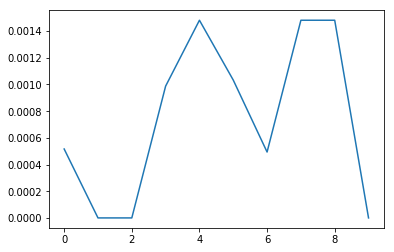

In [163]:
percentile_split(10)

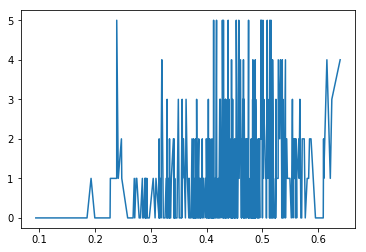

In [116]:
plt.plot(s_res_sort['gini'], s_res_sort['playoffs'])

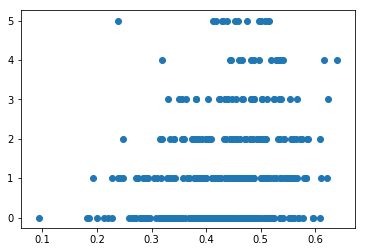

In [119]:
plt.scatter(s_res_sort['gini'], s_res_sort['playoffs'])
plt.show()

In [120]:
np.corrcoef(s_res_sort['gini'], s_res_sort['playoffs'])

array([[ 1.        ,  0.22905054],
       [ 0.22905054,  1.        ]])

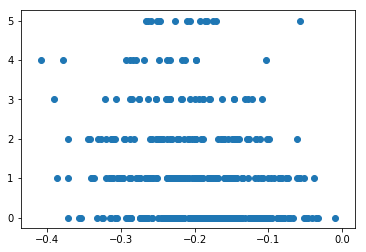

In [122]:
plt.scatter([-p**2 for p in s_res_sort['gini']], s_res_sort['playoffs'])
plt.show()

In [123]:
np.corrcoef([-p**2 for p in s_res_sort['gini']], s_res_sort['playoffs'])

array([[ 1.       , -0.2321559],
       [-0.2321559,  1.       ]])

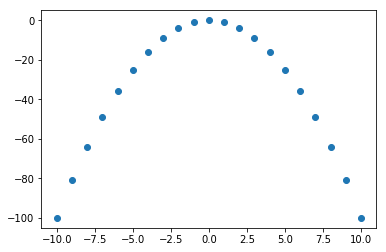

In [134]:
import math
x = range(-10,11)
y = [-t**2 for t in range(-10,11)]
plt.scatter(x, y)
plt.show()

In [140]:
print x
print y

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[-100, -81, -64, -49, -36, -25, -16, -9, -4, -1, 0, -1, -4, -9, -16, -25, -36, -49, -64, -81, -100]


In [142]:
np.corrcoef([-t**2 for t in x], y)

array([[ 1.,  1.],
       [ 1.,  1.]])

In [149]:
print np.corrcoef(s_res['playoffs'], s_res['W'])
print np.corrcoef([t**2 for t in s_res['W']], s_res['playoffs'])

[[ 1.          0.76221157]
 [ 0.76221157  1.        ]]
[[ 1.          0.79729238]
 [ 0.79729238  1.        ]]


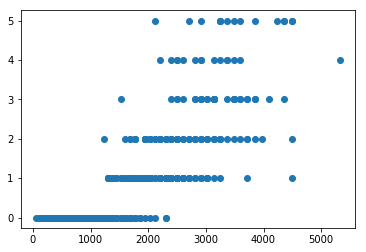

In [148]:
plt.scatter([t**2 for t in s_res['W']], s_res['playoffs'])
plt.show()

## Find what pct. of workload is carried by top k players

In [13]:
df = pd.read_excel('data/season_data/season_data_2017.xlsx')

In [14]:
df

,G,GS,age,ast,blk,drb,efg,fg,fg2,fg2_pct,...,orb,pf,player,pos,pts,stl,team,tov,trb,yr
0,68,6,23,40,8,68,0.531,134,40,0.426,...,18,114,Alex Abrines,SG,406,37,OKC,33,86,2017
1,38,1,26,18,15,95,0.521,70,33,0.413,...,20,67,Quincy Acy,PF,222,14,TOT,21,115,2017
2,6,0,26,0,0,6,0.324,5,4,0.400,...,2,9,Quincy Acy,PF,13,0,DAL,2,8,2017
3,32,1,26,18,15,89,0.542,65,29,0.414,...,18,58,Quincy Acy,PF,209,14,BRK,19,107,2017
4,80,80,23,86,78,332,0.571,374,374,0.572,...,281,195,Steven Adams,C,905,89,OKC,146,613,2017
5,61,45,31,78,6,116,0.514,185,123,0.457,...,9,104,Arron Afflalo,SG,515,21,SAC,42,125,2017
6,39,15,28,12,22,131,0.500,89,89,0.511,...,46,77,Alexis Ajinca,C,207,20,NOP,31,177,2017
7,62,0,28,25,23,107,0.523,45,45,0.523,...,51,85,Cole Aldrich,C,105,25,MIN,17,158,2017
8,72,72,31,139,88,351,0.488,500,477,0.480,...,172,158,LaMarcus Aldridge,PF,1243,46,SAS,98,523,2017
9,61,5,27,57,24,114,0.458,77,77,0.461,...,105,78,Lavoy Allen,PF,177,18,IND,29,219,2017


In [38]:
def get_avg_usg(yr, k):
    df = pd.read_excel('data/season_data/season_data_' + str(yr) + '.xlsx')
    df = df[df['mp'] > 0]
    usg_lst = []
    for team in np.unique(df['team']):
        #print team, yr
        if team != 'TOT':
            team_df = df[df['team'] == team]
            n_usg = sorted(calculate_usg_n(team_df, 1))
            usg_lst.append( (sum(n_usg[-k:])/sum(n_usg)) )
    return np.mean(usg_lst)

In [39]:
yrs = range(2003, 2018)
avg_usg_df = pd.DataFrame()
for yr in yrs:
    avg_usg_df = avg_usg_df.append({
            'yr': yr,
            'top8': get_avg_usg(yr, 8),
            'top9': get_avg_usg(yr, 9),
            'top10': get_avg_usg(yr, 10)
        }, ignore_index=True)

In [41]:
np.mean(avg_usg_df['top9'])

0.8734562077659166

In [27]:
team_df = df[df['team'] == 'BOS']
n_usg = sorted(calculate_usg_n(team_df, 1))
sum(n_usg[-9:])/sum(n_usg)

0.8972879425958393

In [22]:
sorted(n_usg)

[296.34391888228174,
 2194.016122327255,
 2943.80194118604,
 8710.01192907622,
 12275.064977316679,
 14160.24075044734,
 21736.647929582305,
 21913.383158313303,
 24348.401865273736,
 29371.9668516276,
 39965.36934950387,
 40342.04746326387,
 43532.207602074945,
 45433.45021418114,
 87857.04592694347]

In [20]:
n_usg[:9]

[40342.04746326387,
 24348.401865273736,
 39965.36934950387,
 12275.064977316679,
 43532.207602074945,
 296.34391888228174,
 14160.24075044734,
 21913.383158313303,
 2194.016122327255]

In [ ]:
def get_top_